# Predicting Pawpularity

#### Objective
PetFinder.my is Malaysia’s leading animal welfare platform, featuring over 180,000 animals with 54,000 happily adopted. PetFinder collaborates closely with animal lovers, media, corporations, and global organizations to improve animal welfare.

Currently, PetFinder.my uses a basic Cuteness Meter to rank pet photos. It analyzes picture composition and other factors compared to the performance of thousands of pet profiles. While this basic tool is helpful, it's still in an experimental stage and the algorithm could be improved.

In this competition, you’ll analyze raw images and metadata to predict the “Pawpularity” of pet photos. You'll train and test your model on PetFinder.my's thousands of pet profiles.

#### Description of data
- CSV file with 9912 rows and 14 columns of metadata (no nulls)
- Folder with 9912 jpeg files linked to metadata via id in file name

#### Issues:
- Selection method of data is unclear
- Unclear whether photos are profile photos
- Pawpularity score is based on webtraffic on pet profile, not based on metadata

Noise
- Metadata does not include information whether featured pets are dog or cat
- Metadata does not include information about pet location 

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/Users/arnet/Desktop/Ironhack/Final_Project/petfinder-pawpularity-score/train.csv')

In [3]:
data.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


## Process metadata

In [4]:
'''SHUFFLE DATA'''

'SHUFFLE DATA'

### Scale pawpularity score (ALSO TRY WITHOUT SCALING)

In [5]:
# get target score
y = data["Pawpularity"]

In [6]:
# Scale and ensure that score is between 0 and 1
maxScore = y.max()
y_scaled= y / maxScore

In [7]:
y_scaled

0       0.63
1       0.42
2       0.28
3       0.15
4       0.72
        ... 
9907    0.15
9908    0.70
9909    0.20
9910    0.20
9911    0.30
Name: Pawpularity, Length: 9912, dtype: float64

## Load image data

In [8]:
import cv2
import os
import numpy as np

In [9]:
def load_house_images(data, inputPath):
    # initialize our images array (i.e., the pet images themselves)
    images = []
   
    # get image files based on Id column in dataframe
    for i in data.Id.values:
        base = os.path.join(inputPath, i).replace('\\','/')
        basePath = f'{base}.jpg'
        #basePaths.append(f'{basePath}.jpg')
        image = cv2.imread(basePath)
        image = cv2.resize(image, (64, 64)) # best image size?
        images.append(image)
    
    # return our set of images
    return np.array(images)


In [10]:
inputPath = '/Users/arnet/Desktop/Ironhack/Final_Project/petfinder-pawpularity-score/train'

# make input path the current directory
os.chdir(inputPath)

images = load_house_images(data, inputPath)

In [11]:
# Visualize photos
import PIL.Image as Image

basePaths= []
for i in data.Id.values:
    base = os.path.join(inputPath, i).replace('\\','/')
    basePath = f'{base}.jpg'
    basePaths.append(basePath)

basePaths[0]


'/Users/arnet/Desktop/Ironhack/Final_Project/petfinder-pawpularity-score/train/0007de18844b0dbbb5e1f607da0606e0.jpg'

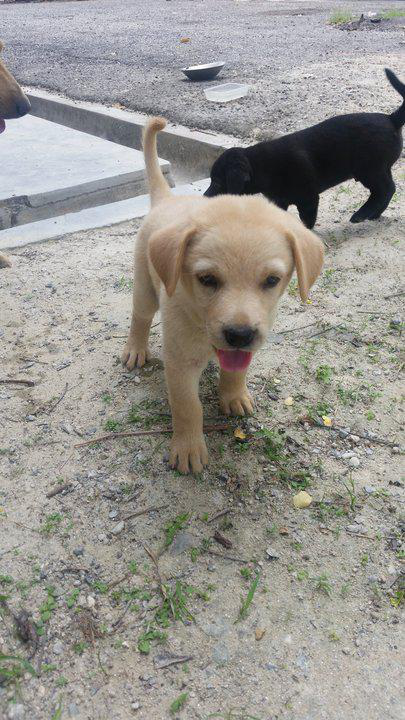

In [12]:
Image.open(str(basePaths[0]))

In [13]:
# scale image size
images = images / 255.0

In [14]:
len(images)

9912

In [15]:
type(images)

numpy.ndarray

In [16]:
images[0]

array([[[0.76078431, 0.70588235, 0.72156863],
        [0.69803922, 0.64313725, 0.65882353],
        [0.78431373, 0.73333333, 0.7372549 ],
        ...,
        [0.69411765, 0.69019608, 0.69803922],
        [0.72941176, 0.73333333, 0.7254902 ],
        [0.74901961, 0.74117647, 0.7372549 ]],

       [[0.75294118, 0.70588235, 0.69803922],
        [0.8       , 0.75294118, 0.74509804],
        [0.77647059, 0.72941176, 0.72156863],
        ...,
        [0.56078431, 0.65882353, 0.6       ],
        [0.56470588, 0.62352941, 0.58039216],
        [0.59607843, 0.61960784, 0.59607843]],

       [[0.7254902 , 0.67843137, 0.67058824],
        [0.74509804, 0.69803922, 0.69019608],
        [0.7372549 , 0.69019608, 0.68235294],
        ...,
        [0.57647059, 0.54509804, 0.54509804],
        [0.59215686, 0.57647059, 0.58431373],
        [0.52941176, 0.54117647, 0.54509804]],

       ...,

       [[0.63137255, 0.63529412, 0.61568627],
        [0.55686275, 0.61176471, 0.62352941],
        [0.41960784, 0

## Split into train and test data

In [17]:
from sklearn.model_selection import train_test_split

In [22]:
# try with both 'y' as well as 'y_scaled'
X_train, X_test, y_train, y_test= train_test_split(images, y, test_size= 0.25, random_state = 32)

In [ ]:
'''from sklearn.model_selection import train_test_split

# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size=0.8

X = df.drop(columns = ['SalePrice']).copy()
y = df['SalePrice']

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)'''

In [ ]:
'''from fast_ml.model_development import train_valid_test_split

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target = 'SalePrice', 
                                                                            train_size=0.8, valid_size=0.1, test_size=0.1)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)'''

## Train model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [ ]:
# Implement our Keras CNN for regression prediction
def create_cnn(width, height, depth, filters=(16, 32, 64), regress=False):
    # initialize the input shape and channel dimension, assuming
    # TensorFlow/channels-last ordering
    inputShape = (height, width, depth)
    chanDim = -1

    # define the model input
    inputs = Input(shape=inputShape)
    # loop over the number of filters
    for (i, f) in enumerate(filters):
        # if this is the first CONV layer then set the input
        # appropriately
        if i == 0:
            x = inputs
        # CONV => RELU => BN => POOL
        
        # here, a Conv2D class is being instantiated, with (32, 64 and 128) filters
        # respectively, a kernel size of 3x3, and multiplied by the tensor 'x'
        # the shape of the tensor 'x' is derived from (in this case) the image size,
        # (64, 64, 3)
        x = Conv2D(f, (3, 3), padding="same")(x) # 'same' padding means that output dimensions are equal to input
        x = Activation("relu")(x)
        x = BatchNormalization(axis=chanDim)(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)
            # flatten the volume, then FC => RELU => BN => DROPOUT
    x = Flatten()(x)
    x = Dense(16)(x)
    x = Activation("relu")(x)
    x = BatchNormalization(axis=chanDim)(x)
    x = Dropout(0.5)(x)
    
    '''# Remove noise
    # Gaussian
    no_noise = []
    for i in range(len(res_img)):
    blur = cv2.GaussianBlur(res_img[i], (5, 5), 0)
    no_noise.append(blur)'''
    
    # apply another FC layer, this one to match the number of nodes
    # coming out of the MLP
    x = Dense(4)(x)
    x = Activation("relu")(x)
    # check to see if the regression node should be added
    if regress:
        x = Dense(1, activation="linear")(x)
    # construct the CNN
    model = Model(inputs, x)
    # return the CNN
    return model

In [ ]:
# create our Convolutional Neural Network and then compile the model
# using mean absolute percentage error as our loss, implying that we
# seek to minimize the absolute percentage difference between our
# price *predictions* and the *actual prices*
model = create_cnn(64, 64, 3, regress=True)
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss="mse",
              optimizer='adam',
              #optimizer=opt, 
              metrics=['mse',
                       'mean_absolute_error',
                       'mean_absolute_percentage_error',
                       tf.metrics.RootMeanSquaredError()])

In [ ]:
tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/', histogram_freq = 1)

In [ ]:
# train the model
print("[INFO] training model...")
model.fit(x=X_train, y=y_train, 
    validation_data=(X_test, y_test),
    epochs=5, 
    batch_size=50,
    callbacks= [tb_callback])

Note:
* Metrics show no further improvements after 10 epochs

* loss (Mean Absolute Percetage Error): 56.9354 - mse: 0.0626 - root_mean_squared_error: 0.2502 - val_loss: 57.6136 - val_mse: 0.0662 - val_root_mean_squared_error: 0.2573

* Tests with and without second dense layer suggest that second dense layer leads to slight improvements: loss: 54.0217 - mse: 0.0634 - root_mean_squared_error: 0.2517 - val_loss: 58.8051 - val_mse: 0.0703 - val_root_mean_squared_error: 0.2652

* Increasing batch size from 8 to 50 resulted in slight improvement

* changing loss function from mean absolute percentage error to mean squared error drastically worsened model results (5 epochs): mean_absolute_percentage_error: 77.8105 - root_mean_squared_error: 0.2531 - val_loss: 0.0558 - val_mse: 0.0558 - val_mean_absolute_percentage_error: 91.5556 - val_root_mean_squared_error: 0.2362

* using MSE as loss function with unscaled y slowed performance and led to significant fluctuations in MAPE while MSE steadily decreased over 5 epochs: 209s 1s/step - loss: 481.6939 - mse: 481.6939 - mean_absolute_percentage_error: 74.7375 - root_mean_squared_error: 21.9475 - val_loss: 97419.4453 - val_mse: 97419.4453 - val_mean_absolute_percentage_error: 285.8291 - val_root_mean_squared_error: 312.1209

* increasing to 10 epochs with MSE and unscaled y did not lead to real improvements as there were significant fluctuations - RMSE were best on first and last epoch: loss: 431.9272 - mse: 431.9272 - mean_absolute_percentage_error: 70.5526 - root_mean_squared_error: 20.7829 - val_loss: 494.7664 - val_mse: 494.7664 - val_mean_absolute_percentage_error: 83.6646 - val_root_mean_squared_error: 22.2433

* Significant decrease in accuracy for no clear reason - loss: 618.4072 - mse: 618.4072 - mean_absolute_error: 18.5816 - mean_absolute_percentage_error: 74.4244 - root_mean_squared_error: 24.8678 - val_loss: 582.9065 - val_mse: 582.9065 - val_mean_absolute_error: 20.1050 - val_mean_absolute_percentage_error: 109.0654 - val_root_mean_squared_error: 24.1435

* changed optimizer to default 'adam': loss: 562.8955 - mse: 562.8955 - mean_absolute_error: 17.5904 - mean_absolute_percentage_error: 72.1364 - root_mean_squared_error: 23.7254 - val_loss: 482.7114 - val_mse: 482.7114 - val_mean_absolute_error: 15.9316 - val_mean_absolute_percentage_error: 69.7869 - val_root_mean_squared_error: 21.9707

In [ ]:
%load_ext tensorboard

## Train model

In [ ]:
train_batch, valid_batch, train_y, test_batch = train_test_split(X_train, y_train, test_size = 0.3, random_state = 32)

In [ ]:
train_batch.shape

In [ ]:
train_y.shape

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), padding='same', input_shape=(64, 64, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(16),
    Activation('relu')
])

In [ ]:
model

In [ ]:
#opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss="mse",
              optimizer='adam',
              #optimizer=opt, 
              metrics=['mse', 
                      tf.keras.metrics.RootMeanSquaredError(),
                      'mean_absolute_error'])

In [ ]:
model.fit(x=train_batch, y=train_y, 
    epochs=5, 
    batch_size=100)

In [ ]:
model4 = Sequential([
    Input(shape=(64, 64, 3)),
    #Conv2D(32, (3, 3), padding='same'),
    #Activation('relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(16, activation= 'relu'),
])

model4.compile(loss="mse",
              optimizer='adam',
              #optimizer=opt, 
              metrics=['mse', 
                      tf.keras.metrics.RootMeanSquaredError(),
                      'mean_absolute_error'])

In [ ]:
model4.fit(x=train_batch, y=train_y,
           validation_data=(valid_batch, test_batch),
           epochs=5, 
           batch_size=8)

* dense FC network of 25 had lower val RMSE than 16.
* two-layered network performed worse
* Epoch 5 651/651 [==============================] - 41s 63ms/step - loss: 400.3010 - mse: 400.3010 - root_mean_squared_error: 20.0075 - mean_absolute_error: 14.9119 - val_loss: 429.0087 - val_mse: 429.0087 - val_root_mean_squared_error: 20.7125 - val_mean_absolute_error: 15.9141 397.8202 - root_mean_squared_error: 19.9454 - mean_absolute_ - ETA: 1s - loss: 396.7077 - mse: 396.7077 - root_mean_squared_error: 19.9175 - mean_absolu - ETA: 0s - loss: 398.1474 - mse: 398.1474 - root_mean_squared_error: 19.9536 - mean_absolute_erro
 this was achieved with a 75/25 split of X_test with one dense layer of 25 neurons and 5
 * three layered model's complexity possibly too high
 * Convoluted layer possibly unecessary

In [ ]:
inputs = Input(shape=inputShape)
    # loop over the number of filters
    for (i, f) in enumerate(filters):
        # if this is the first CONV layer then set the input
        # appropriately
        if i == 0:
            x = inputs
        # CONV => RELU => BN => POOL
        
        # here, a Conv2D class is being instantiated, with (32, 64 and 128) filters
        # respectively, a kernel size of 3x3, and multiplied by the tensor 'x'
        # the shape of the tensor 'x' is derived from (in this case) the image size,
        # (64, 64, 3)
        x = Conv2D(f, (3, 3), padding="same")(x) # 'same' padding means that output dimensions are equal to input
        x = Activation("relu")(x)
        x = BatchNormalization(axis=chanDim)(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)
            # flatten the volume, then FC => RELU => BN => DROPOUT
    x = Flatten()(x)
    x = Dense(16)(x)
    x = Activation("relu")(x)
    x = BatchNormalization(axis=chanDim)(x)
    x = Dropout(0.5)(x)

In [24]:
model10 = Sequential([
    Conv2D(32, (3, 3), padding='same', input_shape=(64, 64, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(25),
    Activation('relu')
])

model10.compile(loss="mse",
              optimizer='adam',
              #optimizer=opt, 
              metrics=['mse', 
                      tf.keras.metrics.RootMeanSquaredError(),
                      'mean_absolute_error'])

In [25]:
#model10.fit(x=train_batch, y=train_y,
 #          validation_data=(valid_batch, test_batch),
model10.fit(x=X_train, y=y_train, 
    validation_data=(X_test, y_test),  
    epochs=5, 
    batch_size=8)

Epoch 1/5
930/930 [==============================] - 31s 33ms/step - loss: 481.8637 - mse: 481.8637 - root_mean_squared_error: 21.9514 - mean_absolute_error: 16.3640 - val_loss: 442.1793 - val_mse: 442.1793 - val_root_mean_squared_error: 21.0281 - val_mean_absolute_error: 15.4451
Epoch 2/5
930/930 [==============================] - 39s 42ms/step - loss: 439.3253 - mse: 439.3253 - root_mean_squared_error: 20.9601 - mean_absolute_error: 15.6468 - val_loss: 455.7964 - val_mse: 455.7964 - val_root_mean_squared_error: 21.3494 - val_mean_absolute_error: 15.1989
Epoch 3/5
930/930 [==============================] - 44s 47ms/step - loss: 428.2500 - mse: 428.2500 - root_mean_squared_error: 20.6942 - mean_absolute_error: 15.4754 - val_loss: 469.1075 - val_mse: 469.1075 - val_root_mean_squared_error: 21.6589 - val_mean_absolute_error: 17.5442
Epoch 4/5
930/930 [==============================] - 62s 66ms/step - loss: 415.8860 - mse: 415.8860 - root_mean_squared_error: 20.3933 - mean_absolute_error: